# Fingerprint bit coverage and variability

We check the coverage and variability of fingerprint bit positions across all fingerprints in our dataset.

- Investigate missing bits across fingerprints
- Investigate bit variability across fingerprints (standard deviation)
- Get top X bit positions with no/high standard deviation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from kissim.encoding import FingerprintGenerator

In [3]:
plt.style.use("seaborn")

In [4]:
HERE = Path(_dh[-1])  # noqa: F821
RESULTS = HERE / "../../results/all"

## Load fingerprints

Let's load our pre-calculated fingerprint saved in a _json_ file as `FingerprintGenerator` object.

In [5]:
fingerprint_generator = FingerprintGenerator.from_json(
    RESULTS / "fingerprints_clean.json", normalize=True
)

In [6]:
n_fingerprints = len(fingerprint_generator.data)
print(f"Number of fingerprints: {n_fingerprints}")

Number of fingerprints: 4623


## Missing bits across fingerprints

In [7]:
def nan_bit_ratio(fingerprint_generator, feature_group):

    if feature_group == "physicochemical":
        features = fingerprint_generator.physicochemical_exploded()
        features = features.drop(["sco.vertex_angle", "exposure.ratio"], axis=1)
    elif feature_group == "distances":
        features = fingerprint_generator.distances_exploded()
    elif feature_group == "moments":
        features = fingerprint_generator.moments_exploded()
    else:
        raise KeyError("Feature group unknown.")

    features = features.unstack()
    features_nan = features.isnull().sum(axis=0) / len(features)
    features_nan = features_nan.unstack(0)

    return features_nan

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

### Missing physicochemical bits

In [8]:
feature_group = "physicochemical"
features_nan = nan_bit_ratio(fingerprint_generator, feature_group)
features_nan

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
residue_ix,,,,,,,,
1,0.001730,0.001730,0.001730,0.001730,0.001730,0.001730,0.067921,0.001730
2,0.000865,0.000865,0.000865,0.000865,0.000865,0.000865,0.028337,0.000865
3,0.001298,0.001298,0.001298,0.001298,0.001298,0.001298,0.005840,0.001514
4,0.007787,0.007787,0.007787,0.007787,0.007787,0.007787,0.949816,0.008003
5,0.030067,0.030067,0.030067,0.030067,0.030067,0.030067,0.133463,0.030500
...,...,...,...,...,...,...,...,...
81,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007571,0.000433
82,0.004110,0.004110,0.004110,0.004110,0.004110,0.004110,0.007138,0.004110
83,0.020982,0.020982,0.020982,0.020982,0.020982,0.020982,0.984642,0.021631


In [9]:
features_nan.describe()

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.012610,0.012610,0.012610,0.012610,0.012610,0.012610,0.095550,0.012831
std,0.040187,0.040187,0.040187,0.040187,0.040187,0.040187,0.213394,0.040287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000216,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003894,0.000216
50%,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.019468,0.000865
75%,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.060350,0.004975
max,0.330521,0.330521,0.330521,0.330521,0.330521,0.330521,0.984642,0.330738


#### Heatmap (for an overview)

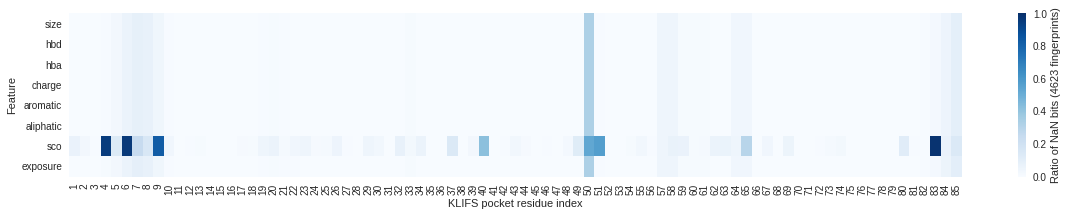

In [10]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_nan.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Ratio of NaN bits ({n_fingerprints} fingerprints)"},
    vmin=0,
    vmax=1,
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

#### Barplot (for concrete values)

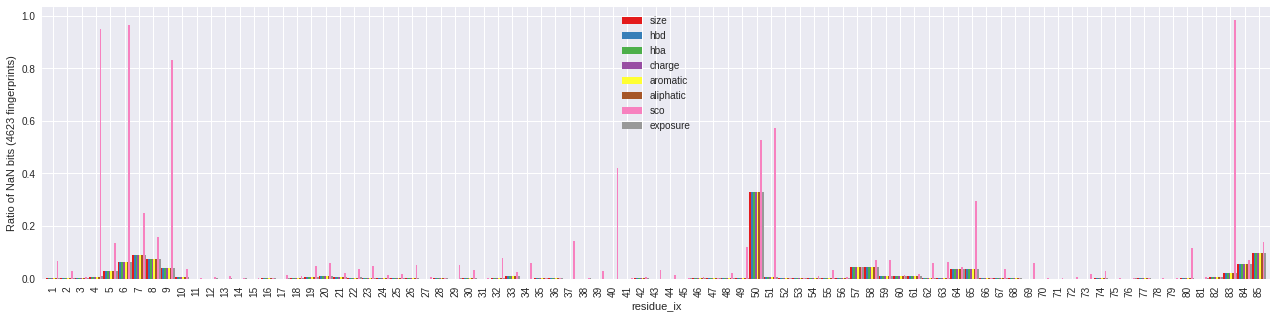

In [11]:
ax = features_nan.plot(kind="bar", figsize=(22, 5), width=1, colormap="Set1")
ax.set_ylabel(f"Ratio of NaN bits ({n_fingerprints} fingerprints)");

__Observations__

- _Side chain orientation_: Gly-rich positions (e.g. 4, 6, 9, 83) have high ratios of missing side orientation values because Gly has no side chain.
- _All feature types_: Higher ratios of missing bits for pocket positions with high ratio of missing residues (e.g. 50, 4-9, 83-58). Check out pattern resemblance with plot on "Missing residues in the kinase binding site" in [this notebook](https://github.com/volkamerlab/kissim_app/blob/master/notebooks/dataset/explore_dataset.ipynb).

### Missing distance bits

In [12]:
feature_group = "distances"
features_nan = nan_bit_ratio(fingerprint_generator, feature_group)
features_nan

,hinge_region,dfg_region,front_pocket,center
residue_ix,,,,
1,0.001730,0.008652,0.001730,0.001730
2,0.000865,0.008003,0.000865,0.000865
3,0.001298,0.008436,0.001298,0.001298
4,0.008003,0.015142,0.008003,0.008003
5,0.030500,0.037205,0.030500,0.030500
...,...,...,...,...
81,0.000000,0.007138,0.000000,0.000000
82,0.004110,0.011248,0.004110,0.004110
83,0.021631,0.028769,0.021631,0.021631


In [13]:
features_nan.describe()

,hinge_region,dfg_region,front_pocket,center
count,85.000000,85.000000,85.000000,85.000000
mean,0.012714,0.019603,0.012714,0.012714
std,0.040204,0.040061,0.040204,0.040204
min,0.000000,0.007138,0.000000,0.000000
25%,0.000000,0.007138,0.000000,0.000000
50%,0.000649,0.007787,0.000649,0.000649
75%,0.004975,0.011464,0.004975,0.004975
max,0.330521,0.337443,0.330521,0.330521


#### Heatmap (for an overview)

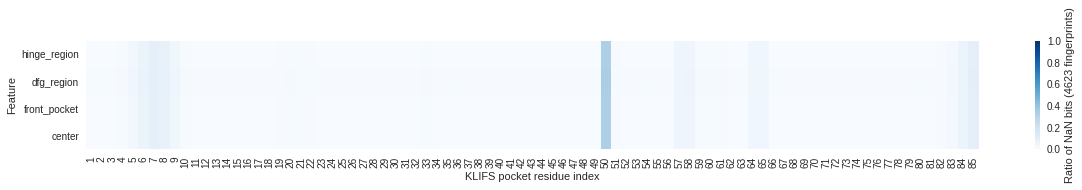

In [14]:
plt.figure(figsize=(20, 2))
sns.heatmap(
    features_nan.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Ratio of NaN bits ({n_fingerprints} fingerprints)"},
    vmin=0,
    vmax=1,
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

#### Barplot (for concrete values)

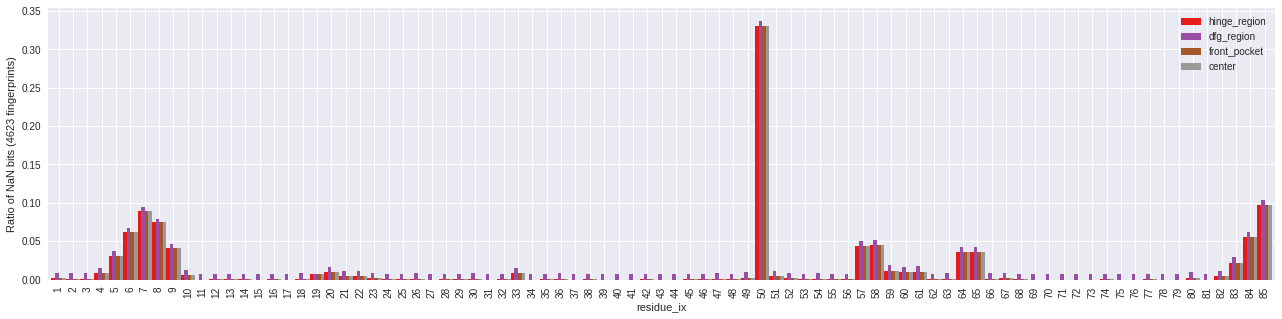

In [15]:
ax = features_nan.plot(kind="bar", figsize=(22, 5), width=1, colormap="Set1")
ax.set_ylabel(f"Ratio of NaN bits ({n_fingerprints} fingerprints)");

__Observations__

- As before for the physicochemical bits, the pattern here resembles the missing residue pattern.

### Missing moments bits

In [16]:
feature_group = "moments"
features_nan = nan_bit_ratio(fingerprint_generator, feature_group)
features_nan

,hinge_region,dfg_region,front_pocket,center
moment,,,,
1,0.0,0.007138,0.0,0.0
2,0.0,0.007138,0.0,0.0
3,0.0,0.007138,0.0,0.0


In [17]:
features = fingerprint_generator.moments_exploded()
structures_nan = features[features.isna().any(axis=1)]
print(
    f"Number of structures with at least one NaN moment: "
    f"{len(structures_nan.index.get_level_values(0).unique())}"
)
structures_nan

Number of structures with at least one NaN moment: 33


hinge_region  dfg_region  front_pocket     center
structure_klifs_id moment                                                   
155                1          12.917907         NaN     13.068491  11.991163
                   2           4.624320         NaN      4.210283   3.425064
                   3           3.087776         NaN      3.197228   1.514162
187                1          12.962350         NaN     13.133341  12.101946
                   2           4.614759         NaN      4.220218   3.481892
...                                 ...         ...           ...        ...
12171              2           4.408917         NaN      4.004810   3.383745
                   3           2.609755         NaN      3.177231   1.635429
12917              1          12.687674         NaN     12.912687  11.818183
                   2           4.455172         NaN      4.078744   3.377513
                   3           2.831118         NaN      3.050934   1.501710

[99 rows x 4 columns]

__Observations__

- About 70 structures show at least one empty moment, matching well with the number of structures for which one or more subpocket centers could not be determined and thus, no distance distribution and no corresponding moments could be inferred. Check out "Number of structures that will have no subpocket centers" in [this notebook](https://github.com/volkamerlab/kissim_app/blob/master/notebooks/dataset/explore_dataset.ipynb).

## Bit variability across fingerprints

In [18]:
def bit_variability(fingerprint_generator, feature_group):

    if feature_group == "physicochemical":
        features = fingerprint_generator.physicochemical_exploded()
        features = features.drop(["sco.vertex_angle", "exposure.ratio"], axis=1)
    elif feature_group == "distances":
        features = fingerprint_generator.distances_exploded()
    elif feature_group == "moments":
        features = fingerprint_generator.moments_exploded()
    else:
        raise KeyError("Feature group unknown.")

    features = features.unstack()
    features_std = features.std()
    features_std = features_std.unstack(0)

    return features_std

### Physicochemical bit variability

In [19]:
features_std = bit_variability(fingerprint_generator, "physicochemical")
features_std

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
residue_ix,,,,,,,,
1,0.621208,0.989225,0.844714,0.795929,0.142006,0.322753,0.498284,0.508988
2,0.599269,0.669889,0.711231,0.627082,0.197619,0.499395,0.444054,0.282851
3,0.316383,0.058772,0.041594,0.029424,0.054988,0.064025,0.463113,0.234471
4,0.232043,0.170792,0.128067,0.064363,0.058964,0.186239,0.609364,0.901912
5,0.644058,0.897195,0.810296,0.742830,0.135597,0.335130,0.193208,0.380399
...,...,...,...,...,...,...,...,...
81,0.081718,0.041568,0.185167,0.099264,0.025469,0.048726,0.415394,0.518286
82,0.265763,0.237416,0.128415,0.025521,0.230439,0.224486,0.323300,0.480853
83,0.088949,0.110820,0.159227,0.069614,0.014864,0.098129,0.465727,0.726345


In [20]:
features_std.describe()

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.480853,0.487117,0.407819,0.276993,0.204987,0.300762,0.364061,0.519857
std,0.194268,0.307619,0.262247,0.253375,0.143551,0.143859,0.198638,0.164805
min,0.014714,0.000000,0.000000,0.000000,0.000000,0.032873,0.000000,0.050893
25%,0.353557,0.249847,0.192872,0.046464,0.098475,0.200653,0.212564,0.438336
50%,0.508310,0.481861,0.423855,0.181147,0.185539,0.322753,0.411700,0.514546
75%,0.621208,0.669889,0.606608,0.512448,0.322944,0.430306,0.506782,0.619741
max,0.816356,1.255542,0.925998,0.815720,0.499776,0.499992,0.772698,0.901912


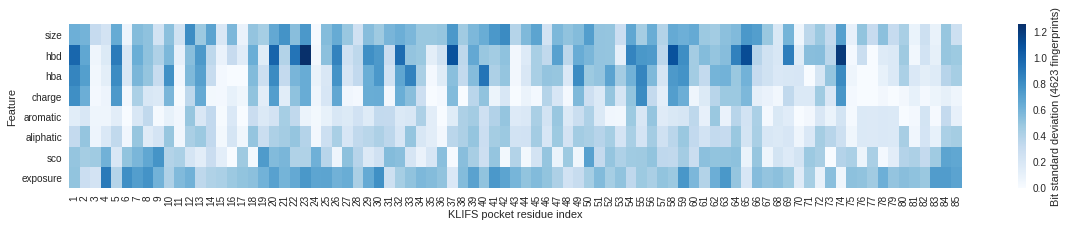

In [21]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

__Observations__

- Highest variability for HBD, lowest for aromatic and aliphatic
- Conserved regions show as expected rigid size/pharmacophoric feature variability (e.g. 4, 6, 17, 24, 70, 75, 81-83).

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

### Distances bit variability

In [22]:
features_std = bit_variability(fingerprint_generator, "distances")
features_std

,hinge_region,dfg_region,front_pocket,center
residue_ix,,,,
1,0.534097,0.908718,0.716293,0.570454
2,0.560823,1.113627,0.819486,0.731000
3,0.843005,1.068987,1.114083,0.965549
4,0.848557,1.400342,1.174295,1.039872
5,0.905113,1.657933,1.257379,1.190550
...,...,...,...,...
81,0.651673,0.769048,0.835343,0.667506
82,1.100182,1.068343,1.748129,0.727517
83,1.167331,1.668648,1.708935,0.854589


In [23]:
features_std.describe()

,hinge_region,dfg_region,front_pocket,center
count,85.000000,85.000000,85.000000,85.000000
mean,0.830084,1.023610,0.961427,0.870150
std,0.448269,0.380413,0.519967,0.415856
min,0.262663,0.485624,0.384574,0.394382
25%,0.492027,0.754635,0.574001,0.579261
50%,0.767269,0.934835,0.819486,0.757094
75%,1.003594,1.151613,1.121422,0.990140
max,2.288374,2.197553,2.933819,2.400925


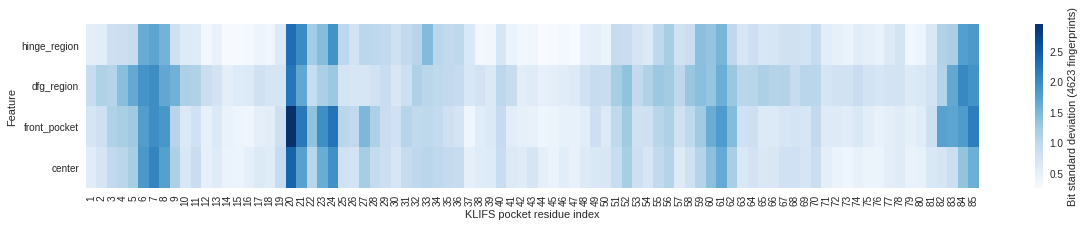

In [24]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

__Observations__

- Higher variability for 
  - residues 6-8 (part of the G-loop, known for loop flexibility) 
  - residues 20-24 (part of aC-helix, known for conformational changes)
  - residues 82-85 (part of DFG-loop and activation loop, know for conformational changes) 
  - residues 59-61 (part of aE-helix, ???)
  - residue 33 w.r.t. hinge region (???)

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

![](https://klifs.net/images/faq/pocket.png)

### Moments bit variability

In [25]:
features_std = bit_variability(fingerprint_generator, "moments")
features_std

,hinge_region,dfg_region,front_pocket,center
moment,,,,
1,0.180204,0.324798,0.220912,0.191055
2,0.159323,0.208161,0.295847,0.150497
3,0.482068,0.554116,0.564540,1.096452


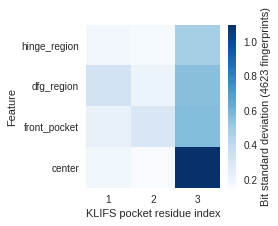

In [26]:
plt.figure(figsize=(3, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

## Top X bit with no/low/high variability

Get per-bit standard deviation for all feature types and check for bits with no/low/high variability.

In [27]:
bits_std = []
for feature_group in ["physicochemical", "distances", "moments"]:
    bits_std.append(bit_variability(fingerprint_generator, feature_group).unstack())
bits_std = pd.concat(bits_std)
bits_std.index.names = ["feature", "residue_ix"]
print(f"Number of bits with std: {len(bits_std)}")

Number of bits with std: 1032


### No variability

In [28]:
bits_std_no_variability = bits_std[bits_std == 0]
bits_std_no_variability.sort_index(level=1)

feature   residue_ix
aromatic  6             0.0
hba       16            0.0
sco       16            0.0
aromatic  17            0.0
hba       17            0.0
charge    35            0.0
aromatic  36            0.0
charge    38            0.0
          43            0.0
aromatic  70            0.0
hba       71            0.0
sco       73            0.0
charge    76            0.0
hba       76            0.0
charge    77            0.0
hba       77            0.0
hbd       77            0.0
charge    79            0.0
aromatic  80            0.0
dtype: float64

In [29]:
print(
    f"Number of bits with no effect because they are always "
    f"(or almost always) the same: {len(bits_std_no_variability)}"
)

Number of bits with no effect because they are always (or almost always) the same: 19


### Low variability

In [30]:
bits_std_low_variability = bits_std[bits_std != 0].sort_values().head(30)
bits_std_low_variability.sort_index(level=1)

feature    residue_ix
charge     3             0.029424
aromatic   9             0.021241
charge     11            0.014707
           14            0.032873
aliphatic  15            0.032873
aromatic   15            0.014707
charge     15            0.025469
hba        15            0.025469
sco        18            0.029543
aromatic   24            0.032887
hbd        24            0.036022
size       24            0.014714
charge     28            0.025471
           31            0.036006
hba        35            0.025477
charge     36            0.029415
sco        37            0.015877
           42            0.032998
           44            0.029598
charge     45            0.025469
           48            0.025471
aromatic   67            0.025485
           71            0.036006
           75            0.020797
charge     75            0.029405
hbd        75            0.025469
sco        78            0.025477
aromatic   81            0.025469
charge     82            0

### High variability

In [31]:
bits_std_high_variability = bits_std[bits_std != 0].sort_values().tail(30)
bits_std_high_variability.sort_index(level=1)

feature       residue_ix
center        6             1.858304
dfg_region    6             1.902472
front_pocket  6             1.801093
center        7             2.070315
dfg_region    7             1.966117
front_pocket  7             1.971441
hinge_region  7             1.707776
center        8             1.771773
front_pocket  8             1.875702
center        20            2.400925
dfg_region    20            2.197553
front_pocket  20            2.933819
hinge_region  20            2.288374
center        21            1.753089
dfg_region    21            1.683238
front_pocket  21            2.184380
hinge_region  21            1.993630
front_pocket  23            1.956129
center        24            1.934248
front_pocket  24            2.233503
hinge_region  24            1.915793
front_pocket  61            1.819513
              82            1.748129
              83            1.708935
dfg_region    84            2.028556
front_pocket  84            1.826019
hinge_region 